# Include libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sksurv.column import encode_categorical

# Data Preprocessing

In [2]:
data = pd.read_csv(os.path.join('..', '..', 'data', 'tidy_Stroke_Vital_Sign.csv'))

data_x = data.drop(['LOC', 'UID', 'Hospital_ID', 'SurvivalWeeks', 'admission_date',
                    'discharge_date', 'death_date', 'Mortality', 'CVDeath', 'SurvivalDays', 'CAD'], axis=1)

data_y = data[['Mortality', 'SurvivalWeeks']]

# Remove high-correlation features

In [3]:
data_x = data_x.drop(['ICU', 'Age'], axis=1)

# Data split

In [4]:
X_temp, X_test, y_temp, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=369)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=369)

In [5]:
categorical_columns = ['Sex', 'AF', 'DM', 'HTN', 'Hyperlipidemia', 'CHF', 'Smoking',
                       'Cancer before adm', 'Foley', 'NG', 'Dyslipidemia']
numerical_columns = np.setdiff1d(data_x.columns, categorical_columns).tolist()

categorical_ix = [data_x.columns.get_loc(col) for col in categorical_columns]
numerical_ix =  np.setdiff1d(list(range(0, len(data_x.columns))), categorical_ix).tolist()

# Numeric data standardization

In [6]:
from sklearn import preprocessing
from sklearn_pandas import DataFrameMapper

scaler = preprocessing.StandardScaler()

standardize = [([col], scaler) for col in numerical_columns]
leave = [(col, None) for col in categorical_columns]

x_mapper = DataFrameMapper(standardize + leave)

X_train = pd.DataFrame(data=x_mapper.fit_transform(X_train),
                       columns=numerical_columns+categorical_columns,
                      index=X_train.index)

X_val = pd.DataFrame(data=x_mapper.fit_transform(X_val),
                       columns=numerical_columns+categorical_columns,
                      index=X_val.index)

X_test = pd.DataFrame(data=x_mapper.fit_transform(X_test),
                      columns=numerical_columns+categorical_columns,
                     index=X_test.index)


# One-hot-Encode

In [7]:
X_train = encode_categorical(X_train, columns=categorical_columns)
X_val = encode_categorical(X_val, columns=categorical_columns)
X_test = encode_categorical(X_test, columns=categorical_columns)

In [8]:
X_train

,ALT,BMI,CHOL,Creatinine,DBP CV,DBP SD,DBPCV G,DBPSD G,E,HR CV,...,AF=1.0,DM=1.0,HTN=1.0,Hyperlipidemia=1.0,CHF=1.0,Smoking=1.0,Cancer before adm=1.0,Foley=1.0,NG=1.0,Dyslipidemia=1.0
6768,0.158840,-1.175619,-0.397269,-0.468863,-1.135194,-1.302942,-1.437421,-1.132825,0.243101,0.101964,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2535,-0.167393,0.314597,-0.397269,0.106966,1.586604,0.498814,1.956454,0.172250,-5.629307,-0.028486,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
6665,4.834838,-1.488084,-0.514325,-0.380274,0.231735,-0.089194,0.825162,0.172250,-5.629307,-0.204292,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2805,36.225649,0.434776,-0.256801,-0.232625,0.391876,1.462953,0.825162,1.477325,0.243101,-0.072298,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
330,-0.022400,0.819348,-0.912316,-0.269537,1.294431,0.663907,0.825162,0.172250,0.243101,-0.546368,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,-0.384881,-0.382440,0.562591,-0.291685,-0.154640,-0.162515,-0.306130,0.172250,0.243101,-0.842559,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4492,-0.457377,-1.632299,0.024133,-0.594364,-0.322733,-0.723669,-0.306130,-1.132825,-5.629307,-1.169380,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8261,-0.167393,0.122311,1.662919,-0.527922,0.390903,0.836873,0.825162,0.172250,0.243101,0.976019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
890,-0.312385,1.924992,-0.092923,-0.579599,-1.595471,-1.550837,-1.437421,-1.132825,0.243101,-0.288650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_test

,ALT,BMI,CHOL,Creatinine,DBP CV,DBP SD,DBPCV G,DBPSD G,E,HR CV,...,AF=1.0,DM=1.0,HTN=1.0,Hyperlipidemia=1.0,CHF=1.0,Smoking=1.0,Cancer before adm=1.0,Foley=1.0,NG=1.0,Dyslipidemia=1.0
8931,-0.249662,-0.123476,0.335472,-0.458434,-0.693390,-0.699783,-0.293546,-1.123492,0.228962,-1.364302,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1829,-0.072249,-0.339685,0.175692,-0.163463,-0.776716,-0.526207,-0.293546,-1.123492,0.228962,-0.329898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5690,-0.178697,-0.243592,-1.125371,-0.138882,-0.428396,-0.003178,-0.293546,0.188962,0.228962,-0.356371,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
8706,0.193871,1.053660,0.152866,-0.302755,-1.372524,-1.479650,-1.425917,-1.123492,0.228962,-1.252890,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6472,-0.160956,-0.579916,-0.166693,0.246219,-0.238393,-0.612002,-0.293546,-1.123492,0.228962,-0.700423,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475,-0.143214,0.092733,0.791985,-0.229012,1.158261,1.409630,0.838824,1.501417,0.228962,-0.471756,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3342,-0.178697,-1.949238,-0.121042,-0.401079,1.500133,1.980930,1.971195,1.501417,0.228962,-0.423056,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
284,-0.214180,-0.916241,0.266995,4.859236,1.717639,0.975613,1.971195,1.501417,0.228962,-0.121838,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9451,0.176129,0.284918,-0.235170,-0.417466,-1.166765,-1.151178,-1.425917,-1.123492,0.228962,-0.203078,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# temp_x = X_test.sort_values(by=['Age'])
# temp_af = temp_x[temp_x['AF=1.0'] == 1]
# temp_non_af = temp_x[temp_x['AF=1.0'] == 0]
# demo_x = pd.concat([temp_af.head(3),
#                     temp_non_af.head(3)])
# demo_x

# Cox’s proportional hazard’s model

In [11]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
y_train_cox =  y_train.copy()
y_train_cox.loc[:, 'Mortality'] = y_train_cox['Mortality'].astype(bool)
y_train_cox = np.array(list(y_train_cox.to_records(index=False)))

y_test_cox =  y_test.copy()
y_test_cox.loc[:, 'Mortality'] = y_test_cox['Mortality'].astype(bool)
y_test_cox = np.array(list(y_test_cox.to_records(index=False)))

estimator.fit(X_train, y_train_cox)
print('C-index = %.3f' %(estimator.score(X_test, y_test_cox)))


C-index = 0.821


# Deepsur (CoxPH)

In [12]:
from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [13]:
import torch
import torchtuples as tt

np.random.seed(369)
_ = torch.manual_seed(369)

## input processing for model

In [14]:
X_train = X_train.values.astype('float32')
X_val = X_val.values.astype('float32')
X_test = X_test.values.astype('float32')

get_target = lambda df: (df['SurvivalWeeks'].values, df['Mortality'].values)
y_train = get_target(y_train)
y_val = get_target(y_val)
durations_test, events_test = get_target(y_test)

val = X_val, y_val


In [15]:
in_features = X_train.shape[1]
num_nodes = [64, 64, 64]
out_features = 1
batch_norm = True
dropout = 0.1
output_bias = False

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm,
                              dropout, output_bias=output_bias)

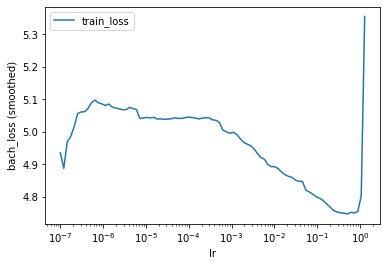

In [16]:
model = CoxPH(net, tt.optim.Adam)
batch_size = 256
lrfinder = model.lr_finder(X_train, y_train, batch_size, tolerance=10)
_ = lrfinder.plot()

In [17]:
lrfinder.get_best_lr()

0.050941380148164093

In [18]:
model.optimizer.set_lr(lrfinder.get_best_lr())

In [19]:
epochs = 100
callbacks = [tt.callbacks.EarlyStopping(patience=20)]
# callbacks = []
verbose = True

In [20]:
log = model.fit(X_train, y_train, batch_size, epochs, callbacks, verbose,
                val_data=val, val_batch_size=batch_size)

0:	[0s / 0s],		train_loss: 4.7155,	val_loss: 5.4070
1:	[0s / 0s],		train_loss: 4.4685,	val_loss: 4.4444
2:	[0s / 0s],		train_loss: 4.4033,	val_loss: 4.4320
3:	[0s / 0s],		train_loss: 4.4200,	val_loss: 4.4356
4:	[0s / 0s],		train_loss: 4.3738,	val_loss: 4.4933
5:	[0s / 0s],		train_loss: 4.3408,	val_loss: 4.4322
6:	[0s / 0s],		train_loss: 4.3299,	val_loss: 4.4128
7:	[0s / 0s],		train_loss: 4.3000,	val_loss: 4.4918
8:	[0s / 0s],		train_loss: 4.3191,	val_loss: 4.4830
9:	[0s / 1s],		train_loss: 4.2929,	val_loss: 4.4394
10:	[0s / 1s],		train_loss: 4.2846,	val_loss: 4.4988
11:	[0s / 1s],		train_loss: 4.2801,	val_loss: 4.4152
12:	[0s / 1s],		train_loss: 4.2664,	val_loss: 4.5679
13:	[0s / 1s],		train_loss: 4.2382,	val_loss: 4.4517
14:	[0s / 1s],		train_loss: 4.2248,	val_loss: 4.5179
15:	[0s / 1s],		train_loss: 4.1902,	val_loss: 4.5106
16:	[0s / 1s],		train_loss: 4.1697,	val_loss: 4.4957
17:	[0s / 1s],		train_loss: 4.3004,	val_loss: 4.6247
18:	[0s / 2s],		train_loss: 4.1599,	val_loss: 4.5489
19:

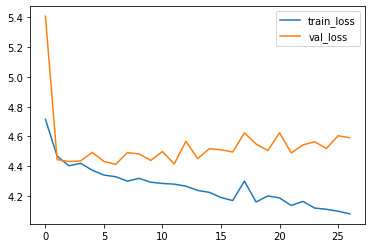

In [21]:
_ = log.plot()

In [22]:
model.partial_log_likelihood(*val).mean()

-6.490306

## Prediction

In [23]:
_ = model.compute_baseline_hazards()

In [24]:
surv = model.predict_surv_df(X_test)

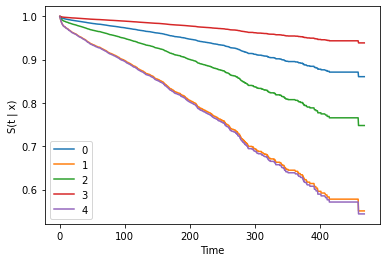

In [25]:
surv.iloc[:, :5].plot()
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

## Evaluation

In [26]:
ev = EvalSurv(surv, durations_test, events_test, censor_surv='km')
print('C-index = %.3f' %(ev.concordance_td()))

C-index = 0.827
